In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import plotly.express as px

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

In [42]:
train = pd.read_csv('train-new.csv')
test = pd.read_csv('test-new.csv')

In [43]:
print('hello world')

hello world


In [44]:
train

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,10-24,131.491,alive,airbag,belted,0,m,28,2002,1997,deploy,driver,1,2:106:1,0
17561,10-24,281.693,alive,none,belted,1,f,39,1998,1987,unavail,driver,0,12:118:1,1
17562,10-24,419.418,alive,airbag,belted,1,f,29,1997,1988,deploy,driver,1,9:37:2,3
17563,40-54,9.815,alive,none,none,1,f,22,2000,1990,unavail,driver,0,49:112:2,3


In [45]:
test

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2
3,10-24,1567.626,alive,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1
4,25-39,31.342,alive,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,10-24,64.757,alive,airbag,none,0,m,37,2001,1999.0,nodeploy,driver,0,6:71:2
8648,1-9km/h,178.651,alive,airbag,none,1,f,16,2001,2001.0,deploy,pass,1,76:57:2
8649,25-39,482.272,alive,airbag,belted,1,m,16,1997,1992.0,deploy,driver,1,74:65:1
8650,55+,32.467,alive,none,belted,1,m,26,1998,1994.0,unavail,driver,0,12:4:2


<AxesSubplot:xlabel='dead', ylabel='count'>

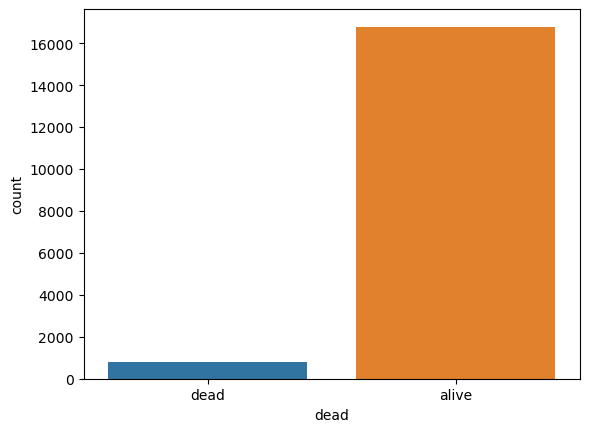

In [46]:
sns.countplot(train['dead'])

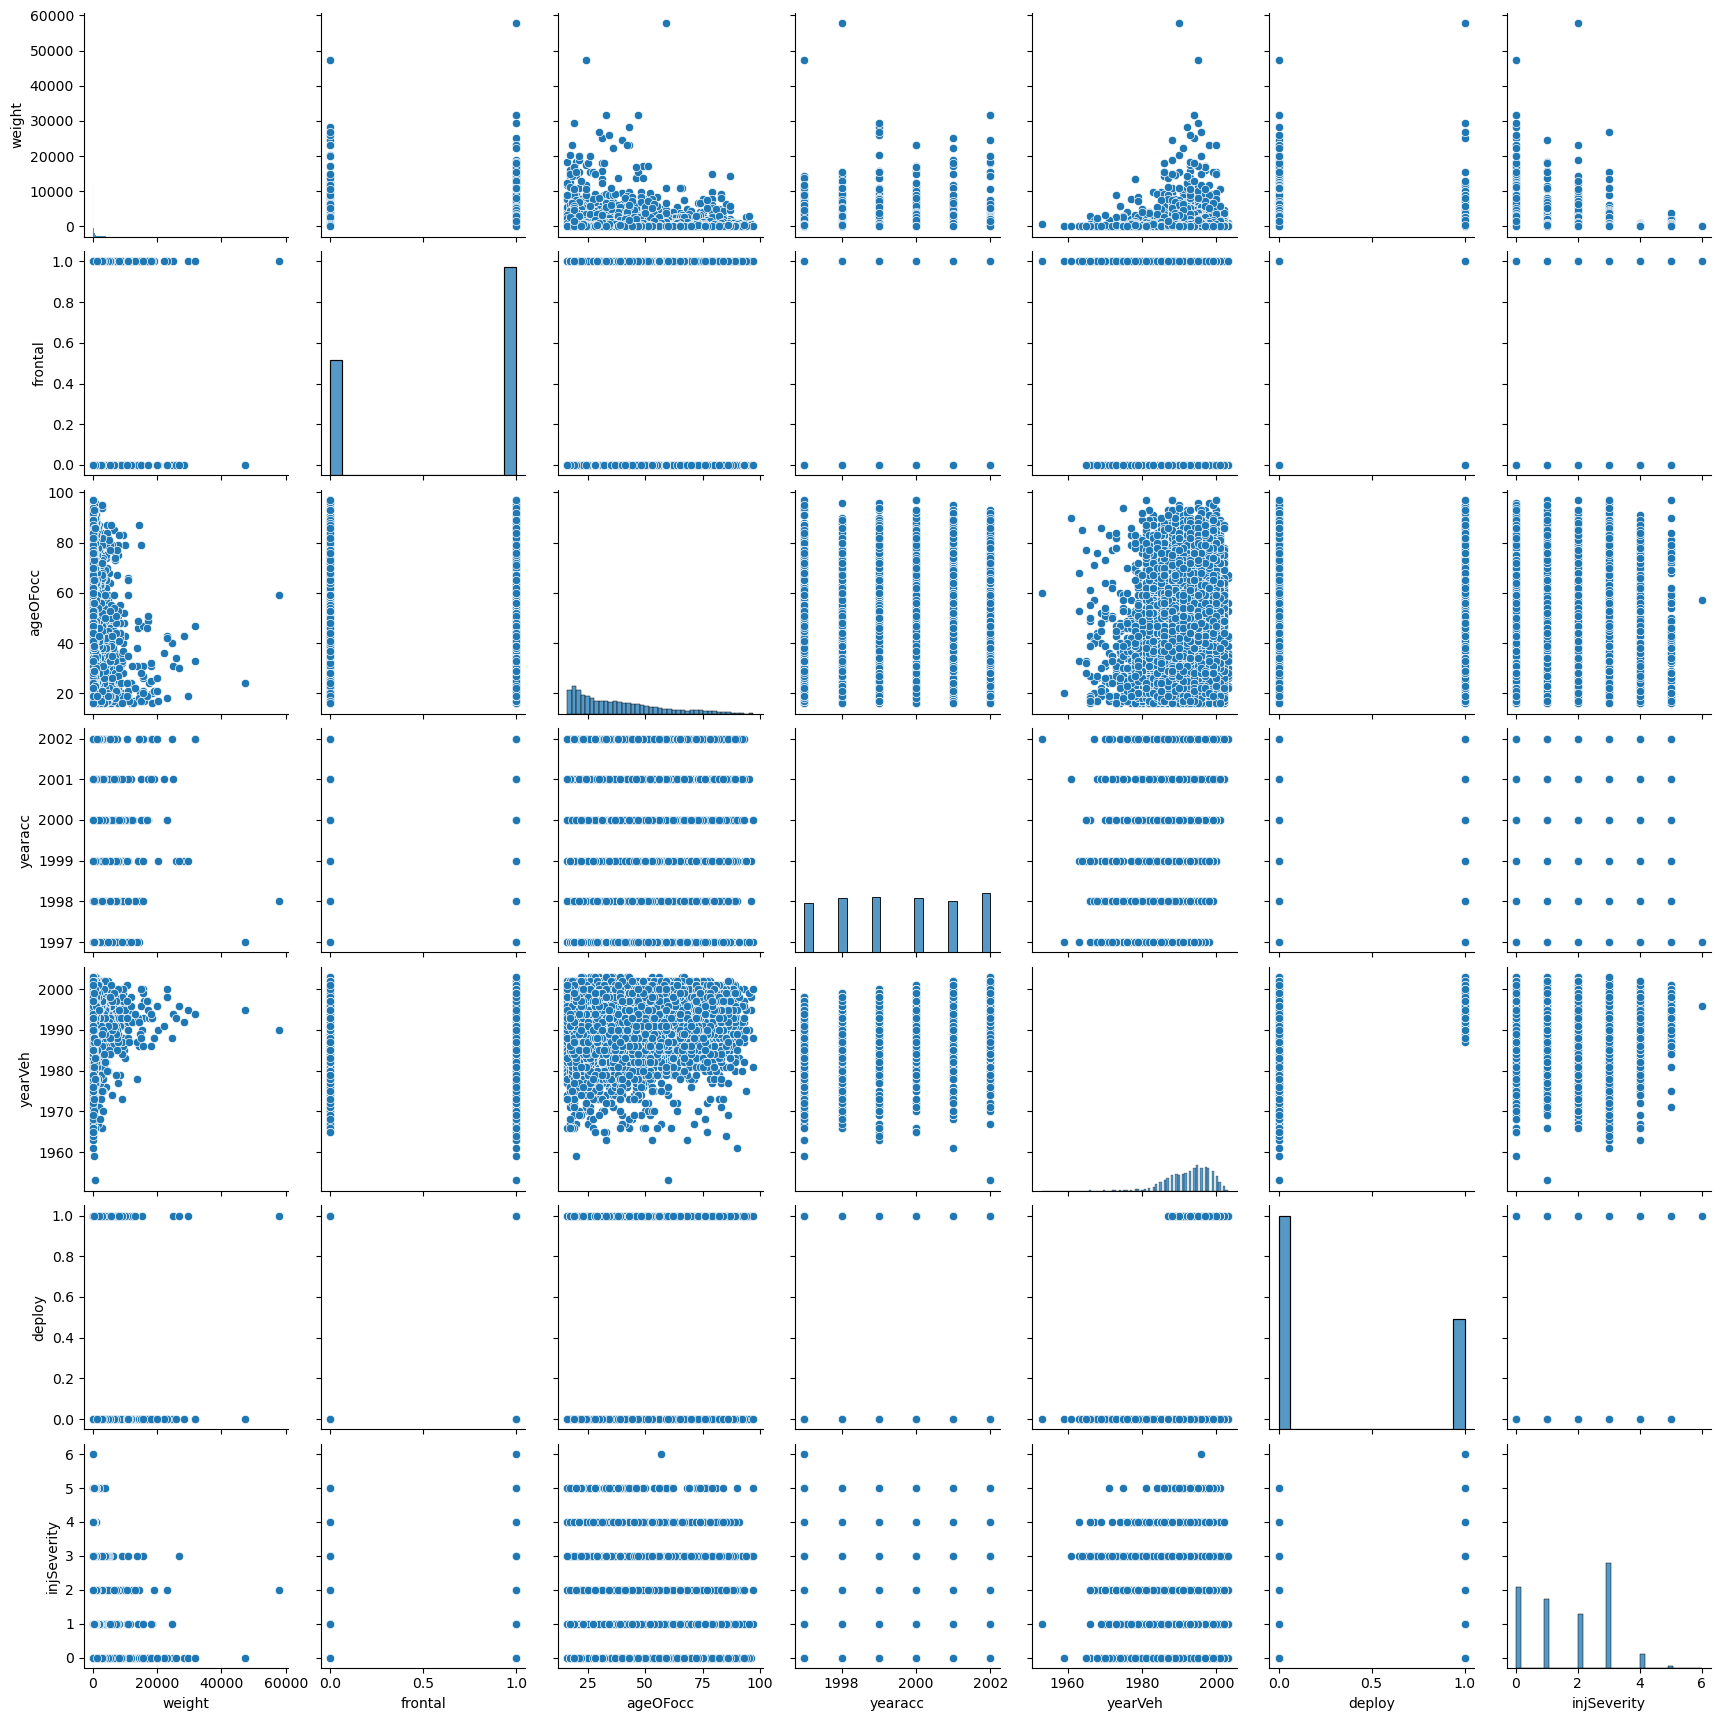

In [47]:
sns.pairplot(train)

In [55]:
# altered = train.replace('belted', 1)
# new_altered = altered.replace('none', 0)
# new_altered = new_altered.replace('airbag',1)
# new_altered = new_altered.replace('alive',1)
# new_altered = new_altered.replace('dead',0)
# new_altered = new_altered.replace('m',1)
# new_altered = new_altered.replace('f',0)
# new_altered = new_altered.replace('driver',1)




,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,0,1,1,1,0,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,1,0,0,1,1,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,1,0,0,1,0,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,1,1,1,1,1,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,1,1,1,0,1,26,2002,1997,nodeploy,pass,0,2:2:2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,10-24,131.491,1,1,1,0,1,28,2002,1997,deploy,driver,1,2:106:1,0
17561,10-24,281.693,1,0,1,1,0,39,1998,1987,unavail,driver,0,12:118:1,1
17562,10-24,419.418,1,1,1,1,0,29,1997,1988,deploy,driver,1,9:37:2,3
17563,40-54,9.815,1,0,0,1,0,22,2000,1990,unavail,driver,0,49:112:2,3


In [73]:
len(train['dead'])

17565

In [93]:


train_cols = ['weight', 'yearVeh','injSeverity']
x = train[train_cols]
y = train['dead']

In [94]:
(X_train, X_test, y_train, y_test) = train_test_split(x, y)

In [95]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression(solver = 'liblinear')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
len(X_train)

13173

In [96]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

ValueError: could not convert string to float: 'alive'